In [1]:
#Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML, Image


%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\norbs\AppData\Local\Temp\ipykernel_23452\2099799310.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
#Functions
def costFunctionReg(X,y,theta,lamda = 10):    
    #Initializations
    m = len(y) 
    J = 0
    
    #Computations
    h = X @ theta
    J_reg = (lamda / (2*m)) * np.sum(np.square(theta))
    J = float((1./(2*m)) * (h - y).T @ (h - y)) + J_reg;
    
    if np.isnan(J):
        return(np.inf)
    
    return(J) 


def gradient_descent_reg(X, y, theta, alpha=0.0005, lamda=10, num_iters=1000):
    # Initialisation of useful values
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], []  # Used for three d plot

    for i in range(num_iters):
        # Hypothesis function
        h = np.dot(X, theta)

        # Calculating the grad function in vectorized form
        theta = theta - alpha * (1 / m) * ((X.T @ (h - y)) + lamda * theta)

        # Cost function in vectorized form
        J_history[i] = costFunctionReg(X, y, theta, lamda)

        # Calculate the cost for each iteration (used to plot convergence)
        theta_0_hist.append(theta[0, 0])
        theta_1_hist.append(theta[1, 0])

    return theta, J_history, theta_0_hist, theta_1_hist

def closed_form_reg_solution(X,y,lamda = 10): 
    m,n = X.shape
    I = np.eye((n))
    return np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y

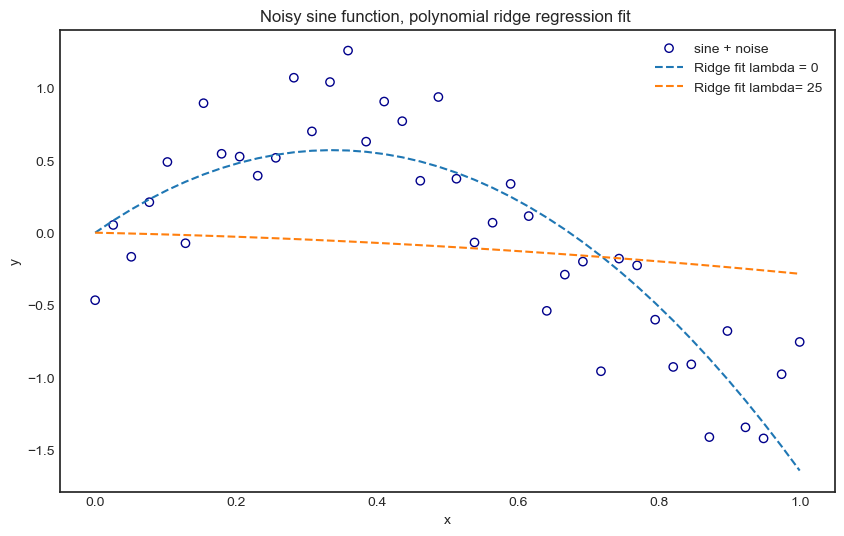

'Coefficients with lambda = 25 are: '

array([[-0.10410056],
       [-0.17979621]])

In [3]:
#Data from sine curve with uniform noise
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)
y_noise = y_noise - y_noise.mean() #Centering the dataset


#Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'sine + noise')
plt.title('Noisy sine function, polynomial ridge regression fit ')
plt.xlabel('x')
plt.ylabel('y')

#Design matrix for polynomial regression of order 2
X = np.vstack((x,x**2)).T

#Calculating closed form regression coefficients with lamda = 0 and 25
theta_calc_0 = closed_form_reg_solution(X,y_noise,lamda = 0)
theta_calc_25 = closed_form_reg_solution(X,y_noise,lamda = 25)

#Plot
plt.plot(x,X@theta_calc_0, '--', label = 'Ridge fit lambda = {}'.format(0))
plt.plot(x,X@theta_calc_25, '--', label = 'Ridge fit lambda= {}'.format(25))
plt.legend()
plt.show()

display('Coefficients with lambda = 25 are: ' ,theta_calc_25)

In [4]:
l = 25 #Complexity hyperparameter lambda = 25

#Setup of meshgrid of theta values
T1, T2 = np.meshgrid(np.linspace(-5,5,100),np.linspace(-6,3,100))

#Computing the cost function for each theta combination
zs = np.array(  [costFunctionReg(X, y_noise.reshape(-1,1),np.array([t1,t2]).reshape(-1,1),l) 
                     for t1, t2 in zip(np.ravel(T1), np.ravel(T2)) ] )
#Reshaping the cost values    
Z = zs.reshape(T1.shape)


NameError: name 'theta_0' is not defined

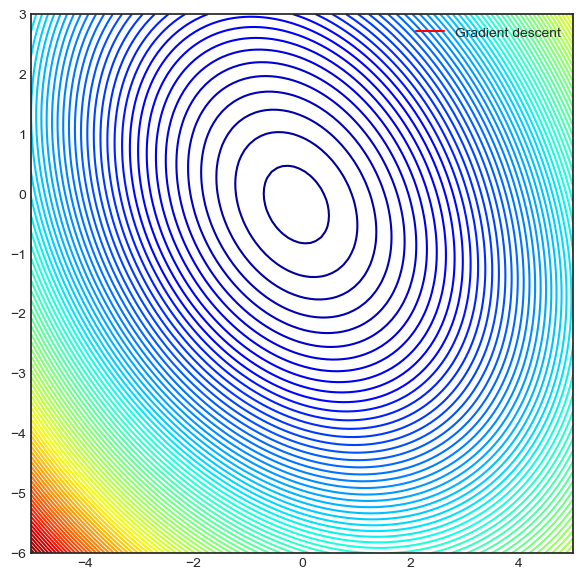

In [5]:
#Plot the contour
fig1, ax1 = plt.subplots(figsize = (7,7))
ax1.contour(T1, T2, Z, 100, cmap = 'jet')


# Create animation
line, = ax1.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax1.plot([], [], '*', color = 'red', markersize = 4)
value_display = ax1.text(0.02, 0.02, '', transform=ax1.transAxes)

theta_calc_25 = closed_form_reg_solution(X, y_noise, lamda=25)
theta, J_history_reg, theta_0_hist, theta_1_hist = gradient_descent_reg(X, y_noise, theta_calc_25)
J_history_reg = np.zeros(len(theta_0_hist))

def init_1():
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate_1(i):
    # Animate line
    line.set_data(theta_0[:i], theta_1[:i])
    
    # Animate points
    point.set_data(theta_0[i], theta_1[i])

    # Animate value display
    value_display.set_text('Min = ' + str(J_history_reg[i]))

    return line, point, value_display

ax1.legend(loc = 1)

anim1 = animation.FuncAnimation(fig1, animate_1, init_func=init_1,
                               frames=len(theta_0), interval=100, 
                               repeat_delay=60, blit=True)
plt.show()
#HTML(anim1.to_jshtml())

In [ ]:
fig2 = plt.figure(figsize = (7,7))
ax2 = Axes3D(fig2)

#Surface plot
ax2.plot_surface(T1, T2, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax2.plot(theta_0,theta_1,J_history_reg, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax2.set_xlabel('theta 1')
ax2.set_ylabel('theta 2')
ax2.set_zlabel('error')
ax2.set_title('RSS gradient descent: Root at {}'.format(theta_result_reg.ravel()))
ax2.view_init(45, -45)

# Create animation
line, = ax2.plot([], [], [], 'r-', label = 'Gradient descent', lw = 1.5)
point, = ax2.plot([], [], [], '*', color = 'red')
display_value = ax2.text(2., 2., 27.5, '', transform=ax1.transAxes)

def init_2():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    display_value.set_text('')

    return line, point, display_value

def animate_2(i):
    # Animate line
    line.set_data(theta_0[:i], theta_1[:i])
    line.set_3d_properties(J_history_reg[:i])
    
    # Animate points
    point.set_data(theta_0[i], theta_1[i])
    point.set_3d_properties(J_history_reg[i])

    # Animate display value
    display_value.set_text('Min = ' + str(J_history_reg[i]))

    return line, point, display_value

ax2.legend(loc = 1)

anim2 = animation.FuncAnimation(fig2, animate_2, init_func=init_2,
                               frames=len(theta_0), interval=120, 
                               repeat_delay=60, blit=True)

#plt.show()
HTML(anim2.to_jshtml())